## 데이콘 Basic 여행 상품 신청 여부 예측 경진대회

https://dacon.io/competitions/official/235959/overview/description

### 변수 정보

### 1. train.csv : 학습 데이터

* id : 샘플 아이디
* Age : 나이
* TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
* CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
* DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
* Occupation : 직업
* Gender : 성별
* NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
* NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
* ProductPitched : 영업 사원이 제시한 상품
* PreferredPropertyStar : 선호 호텔 숙박업소 등급
* MaritalStatus : 결혼여부
* NumberOfTrips : 평균 연간 여행 횟수
* Passport : 여권 보유 여부 (0: 없음, 1: 있음)
* PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
* OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
* NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
* Designation : (직업의) 직급
* MonthlyIncome : 월 급여
* ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)


### 2. 목적
* 나이, 성별, 월 수입 등의 고객 데이터를 이용해서 여행 상품 신청 여부를 예측

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. train.csv

In [62]:
# train 데이터 불러오기

train = pd.read_csv('train.csv')
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [3]:
# 변수 타입 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [9]:
# 범주형: 변수 범주 확인
## 제품 인지 방법

print(train['TypeofContact'].unique())

['Company Invited' 'Self Enquiry' nan]


In [10]:
## 직업

print(train['Occupation'].unique())

['Small Business' 'Salaried' 'Large Business' 'Free Lancer']


In [11]:
## 성별

print(train['Gender'].unique())

['Male' 'Female' 'Fe Male']


In [14]:
## 영업사원 제시 상품

print(train['ProductPitched'].unique())

['Basic' 'Deluxe' 'King' 'Standard' 'Super Deluxe']


In [15]:
## 결혼여부

print(train['MaritalStatus'].unique())

['Married' 'Single' 'Divorced' 'Unmarried']


In [16]:
## 직급

print(train['Designation'].unique())

['Executive' 'Manager' 'VP' 'Senior Manager' 'AVP']


### Gender 값 변경

https://jimmy-ai.tistory.com/245

In [63]:
train['Gender'].value_counts()

Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

In [64]:
# Fe Male을 Female로 변경

train.loc[train['Gender']=='Fe Male','Gender']= 'Female'

In [65]:
train['Gender'].value_counts()

Male      1207
Female     748
Name: Gender, dtype: int64

### 2. 중복 데이터

In [37]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1950    False
1951    False
1952    False
1953    False
1954    False
Length: 1955, dtype: bool

In [38]:
# 중복 데이터 없음

train[train.duplicated()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken


### 3. 결측치

In [39]:
# 결측치 확인

train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [40]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [ ]:
# 결측치

Age(나이)  94
TypeofContact(고객의 제품 인지 방법)  10
DurationOfPitch(영업사원이 고객에게 제공하는 프레젠테이션 기간)  102
NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수)  13
PreferredPropertyStar(선호 호텔 숙박업소 등급)  10
NumberOfTrips(평균 여간 여행 횟수)  57
NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수)  27
MonthlyIncome(월 급여)  100

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [ ]:
# 연속형

Age(나이)  94
DurationOfPitch(영업사원이 고객에게 제공하는 프레젠테이션 기간)  102
NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수)  13
PreferredPropertyStar(선호 호텔 숙박업소 등급)  10
NumberOfTrips(평균 여간 여행 횟수)  57
NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수)  27
MonthlyIncome(월 급여)  100

In [ ]:
# 범주형

TypeofContact(고객의 제품 인지 방법)  10

In [ ]:
## 범주형 데이터의 결측치는 삭제
## 수치형 데이터의 결측치는 중간값이나 평균으로 대체하거나, 0으로 대체

### 결측치 처리

* 결측치 처리 방법

1. 평균값으로 대체 (Mean Imputation)
</br>  결측치가 존재하는 변수에서 결측되지 않은 나머지 값들의 평균을 내어 결측치를 대체하는 방법. 해당 값으로 대체 시 변수의 평균값이 변하지 않는다는 장점이 있지만, 많은 단점이 존재한다. 
</br> 
2. 새로운 값으로 대체 (Substitution)
</br> 아예 해당 데이터 대신에 샘플링 되지 않은 다른 데이터에서 값을 가져온다.
</br> 
3. Hot deck imputation
</br> 다른 변수에서 비슷한 값을 갖는 데이터 중에서 하나를 랜덤 샘플링하여 그 값을 복사해오는 방법. 이 방법은 결측값이 존재하는 변수가 가질 수 있는 값의 범위가 한정되어 있을 때 이점을 갖는다. 또한 random하게 가져온 값이기 때문에 어느 정도 변동성을 더해준다는 점에서 표준오차의 정확도에 어느 정도 기여를 한다는 점이다.
</br> 
4. Cold deck imputation
</br> Hot deck imputation과 유사하게, 다른 변수에서 비슷한 값을 갖는 데이터 중에서 하나를 골라 그 값으로 결측치를 대체하는 방식이다. 다만 cold deck imputation에서는 비슷한 양상의 데이터 중에서 하나를 랜덤 샘플링하는 것이 아니라 어떠한 규칙 하(예를 들면, k번째 샘플의 값을 취해온다는 등)에서 하나를 선정하는 것이다. 이 경우 hot deck imputation 과정에서 부여되는 random variation이 제거된다.
</br> 
5. Regression imputation
</br> 결측치가 존재하지 않는 변수를 feature로 삼고, 결측치를 채우고자 하는 변수를 target으로 삼아 regression task를 진행하는 것이다. 데이터 내의 다른 변수를 기반으로 결측치를 예측하는 것이기 때문에 변수 간 관계를 그대로 보존할 수 있지만 동시에 예측치 간 variability는 보존하지 못한다. (회귀분석을 생각해보면 regression line은 random component가 존재하지 않는다. regression 값 그 자체로 존재한다. )
</br> 
6. Stochastic regression imputation
</br> regression 방법에 random residual value를 더해서 결측치의 최종 예측값으로 대체하는 방식. regression 방법의 이점을 모두 갖는데다 random component를 갖는 데에서 따르는 이점 또한 갖는다. 
</br> 
7. Interpolation and extrapolation (보간법, 보외법)
</br> 같은 대상으로부터 얻은 다른 관측치로부터 결측치 부분을 추정하는 것이다. 이 경우는 longitudinal data의 경우(어린이의 성장 과정을 추적하는 과정에서 얻은 키 데이터라든지 하는 경우)에만 가능할 것이다. 

https://choigww.github.io/data%20preprocessing/2021/02/18/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B2%B0%EC%B8%A1%EC%B9%98-%EC%B1%84%EC%9A%B0%EB%8A%94-6%EA%B0%80%EC%A7%80-%EB%B0%A9%EB%B2%95/

In [ ]:
* 결측치 무시: 대부분의 알고리즘에서 오류 발생
* 데이터 제거: 중요 정보 손실 가능성 존재
* 평균/중앙값 대체: 변수 간 상관관계 고려하지 않음, 정확하지 않음
* 최빈값 대체: 변수 간 상관관계 고려하지 않음, 데이터 편향성 만들어낼 수 있음
* 0으로 대체: 상관관계 고려하지 않음, 편향
* knn imputation: outlier에 민감함

### 범주형
* 삭제

In [72]:
# 범주형
## 결측치 수 적음, 값 대체 시 편향 만들 수 있으며 예측에 영향 미칠 수 있을듯
## 결측치의 특성이 '무작위로 손실' 되지 않았다면, 대부분의 경우 가장 좋은 방법은 제거하는 것

TypeofContact(고객의 제품 인지 방법)  10

SyntaxError: invalid syntax (Temp/ipykernel_22844/1074145661.py, line 5)

In [71]:
train_n = train.copy()

In [72]:
train_n = train_n.dropna(subset=['TypeofContact'])

In [73]:
train_n.isnull().sum()

id                           0
Age                         94
TypeofContact                0
CityTier                     0
DurationOfPitch             92
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           13
ProductPitched               0
PreferredPropertyStar       10
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome               90
ProdTaken                    0
dtype: int64

In [74]:
train_n['TypeofContact'].unique()

array(['Company Invited', 'Self Enquiry'], dtype=object)

In [75]:
train_n

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


### 수치형
* K-NN Imputation
- KDTree 생성 후 가장 가까운 이웃(NN) 찾기
- K개의 NN을 찾은 뒤에는 거리에 따라 가중 평균 취함

In [76]:
train_na=train_n.copy()

In [ ]:
Age(나이)  94
DurationOfPitch(영업사원이 고객에게 제공하는 프레젠테이션 기간)  102
NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수)  13
PreferredPropertyStar(선호 호텔 숙박업소 등급)  10
NumberOfTrips(평균 여간 여행 횟수)  57
NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수)  27
MonthlyIncome(월 급여)  100

In [ ]:
'Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome'

In [77]:
# 범주형 칼럼 추출

ob = train_na.columns[train_na.dtypes == 'object']
ob

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [78]:
# 라벨 인코더
## knn임퓨터는 수치형 자료에만 적용 가능 >> 문자형 변수 숫자로 변환

from sklearn.preprocessing import LabelEncoder

for col in ob:
    encoder = LabelEncoder()  # 라벨 인코더
    encoder.fit(train_na[col])  # 학습
    train_na[col] = encoder.transform(train_na[col]) # 문자형 변수 숫자로 변환
    
train_na

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,1,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,NaN,3,0,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,NaN,2,1,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,NaN,0
3,4,29.0,0,1,7.0,3,1,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,1,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [79]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3) # k 홀수, knnimputer 정의
train_im = imputer.fit_transform(train_na) # 임퓨터로 결측치 대체
train_im = pd.DataFrame(train_im)
train_im 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,28.0,0.0,1.0,10.000000,3.0,1.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,20384.000000,0.0
1,2.0,34.0,1.0,3.0,18.333333,3.0,0.0,2.0,4.0,1.0,4.0,2.0,1.0,1.0,5.0,1.0,0.0,2.0,19599.000000,1.0
2,3.0,45.0,0.0,1.0,9.333333,2.0,1.0,2.0,3.0,1.0,4.0,1.0,2.0,0.0,4.0,1.0,0.0,2.0,20060.333333,0.0
3,4.0,29.0,0.0,1.0,7.000000,3.0,1.0,3.0,5.0,0.0,4.0,1.0,3.0,0.0,4.0,0.0,1.0,1.0,21274.000000,1.0
4,5.0,42.0,1.0,3.0,6.000000,2.0,1.0,2.0,3.0,1.0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,2.0,19907.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,1951.0,28.0,1.0,1.0,10.000000,3.0,1.0,3.0,5.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,2.0,1.0,20723.000000,0.0
1941,1952.0,41.0,1.0,3.0,8.000000,2.0,0.0,3.0,3.0,4.0,5.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,31595.000000,0.0
1942,1953.0,38.0,0.0,3.0,28.000000,3.0,0.0,3.0,4.0,0.0,3.0,0.0,7.0,0.0,2.0,1.0,2.0,1.0,21651.000000,0.0
1943,1954.0,28.0,1.0,3.0,30.000000,3.0,0.0,3.0,5.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,22218.000000,0.0


In [80]:
train_na.columns

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

In [81]:
train_im.columns = ['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken']
train_im

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1.0,28.0,0.0,1.0,10.000000,3.0,1.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,20384.000000,0.0
1,2.0,34.0,1.0,3.0,18.333333,3.0,0.0,2.0,4.0,1.0,4.0,2.0,1.0,1.0,5.0,1.0,0.0,2.0,19599.000000,1.0
2,3.0,45.0,0.0,1.0,9.333333,2.0,1.0,2.0,3.0,1.0,4.0,1.0,2.0,0.0,4.0,1.0,0.0,2.0,20060.333333,0.0
3,4.0,29.0,0.0,1.0,7.000000,3.0,1.0,3.0,5.0,0.0,4.0,1.0,3.0,0.0,4.0,0.0,1.0,1.0,21274.000000,1.0
4,5.0,42.0,1.0,3.0,6.000000,2.0,1.0,2.0,3.0,1.0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,2.0,19907.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,1951.0,28.0,1.0,1.0,10.000000,3.0,1.0,3.0,5.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,2.0,1.0,20723.000000,0.0
1941,1952.0,41.0,1.0,3.0,8.000000,2.0,0.0,3.0,3.0,4.0,5.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,31595.000000,0.0
1942,1953.0,38.0,0.0,3.0,28.000000,3.0,0.0,3.0,4.0,0.0,3.0,0.0,7.0,0.0,2.0,1.0,2.0,1.0,21651.000000,0.0
1943,1954.0,28.0,1.0,3.0,30.000000,3.0,0.0,3.0,5.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,22218.000000,0.0


In [82]:
train_r = train_im.copy()
train_r

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1.0,28.0,0.0,1.0,10.000000,3.0,1.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,20384.000000,0.0
1,2.0,34.0,1.0,3.0,18.333333,3.0,0.0,2.0,4.0,1.0,4.0,2.0,1.0,1.0,5.0,1.0,0.0,2.0,19599.000000,1.0
2,3.0,45.0,0.0,1.0,9.333333,2.0,1.0,2.0,3.0,1.0,4.0,1.0,2.0,0.0,4.0,1.0,0.0,2.0,20060.333333,0.0
3,4.0,29.0,0.0,1.0,7.000000,3.0,1.0,3.0,5.0,0.0,4.0,1.0,3.0,0.0,4.0,0.0,1.0,1.0,21274.000000,1.0
4,5.0,42.0,1.0,3.0,6.000000,2.0,1.0,2.0,3.0,1.0,3.0,0.0,2.0,0.0,3.0,1.0,0.0,2.0,19907.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,1951.0,28.0,1.0,1.0,10.000000,3.0,1.0,3.0,5.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,2.0,1.0,20723.000000,0.0
1941,1952.0,41.0,1.0,3.0,8.000000,2.0,0.0,3.0,3.0,4.0,5.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,31595.000000,0.0
1942,1953.0,38.0,0.0,3.0,28.000000,3.0,0.0,3.0,4.0,0.0,3.0,0.0,7.0,0.0,2.0,1.0,2.0,1.0,21651.000000,0.0
1943,1954.0,28.0,1.0,3.0,30.000000,3.0,0.0,3.0,5.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,22218.000000,0.0


In [ ]:
Age(나이)  94
DurationOfPitch(영업사원이 고객에게 제공하는 프레젠테이션 기간)  102
NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수)  13
PreferredPropertyStar(선호 호텔 숙박업소 등급)  10
NumberOfTrips(평균 여간 여행 횟수)  57
NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수)  27
MonthlyIncome(월 급여)  100

In [166]:
print(train_r['Age'].mean())
print(train_r['DurationOfPitch'].mean())
print(train_r['NumberOfTrips'].mean())
print(train_r['MonthlyIncome'].mean())

37.41182519280206
15.534704370179945
3.2339331619537295
23577.019708654683


### 4. 이상치

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [12]:
# 컬럼명 출력

train.columns

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

### 이상치 수 확인

In [89]:
# 수치형

col_num = ['id', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 
'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 
'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'ProdTaken']

In [92]:
def outlier_iqr2(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')   
    
    # 1사분위와 4사분위 데이터   
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]   
  
    
    # 이상치 존재 행
    return np.where((data[column]>upper)|(data[column]<lower))

In [94]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')   
    
    # 1사분위와 4사분위 데이터   
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]   
  
    # 이상치 총 개수
    return print('총 이상치 수', data1.shape[0] + data2.shape[0])

In [95]:
# 결측치 처리한 데이터로 이상치 확인

for i in range(len(col_num)):
    print()
    print('변수명: %s' %col_num[i])
    outlier_iqr(train_im, col_num[i])


변수명: id
IQR은 974.0 이다.
lower bound 값은 -970.0 이다.
upper bound 값은 2926.0 이다.
총 이상치 수 0

변수명: Age
IQR은 12.0 이다.
lower bound 값은 13.0 이다.
upper bound 값은 61.0 이다.
총 이상치 수 0

변수명: CityTier
IQR은 2.0 이다.
lower bound 값은 -2.0 이다.
upper bound 값은 6.0 이다.
총 이상치 수 0

변수명: DurationOfPitch
IQR은 11.0 이다.
lower bound 값은 -7.5 이다.
upper bound 값은 36.5 이다.
총 이상치 수 0

변수명: NumberOfPersonVisiting
IQR은 1.0 이다.
lower bound 값은 0.5 이다.
upper bound 값은 4.5 이다.
총 이상치 수 1

변수명: NumberOfFollowups
IQR은 1.0 이다.
lower bound 값은 1.5 이다.
upper bound 값은 5.5 이다.
총 이상치 수 120

변수명: PreferredPropertyStar
IQR은 1.0 이다.
lower bound 값은 1.5 이다.
upper bound 값은 5.5 이다.
총 이상치 수 0

변수명: NumberOfTrips
IQR은 2.0 이다.
lower bound 값은 -1.0 이다.
upper bound 값은 7.0 이다.
총 이상치 수 38

변수명: Passport
IQR은 1.0 이다.
lower bound 값은 -1.5 이다.
upper bound 값은 2.5 이다.
총 이상치 수 0

변수명: PitchSatisfactionScore
IQR은 2.0 이다.
lower bound 값은 -1.0 이다.
upper bound 값은 7.0 이다.
총 이상치 수 0

변수명: OwnCar
IQR은 1.0 이다.
lower bound 값은 -1.5 이다.
upper bound 값은 2.5 이다.
총 이상치 수 0

변수명:

In [ ]:
NumberOfPersonVisiting: 1
NumberOfFollowups: 120
NumberOfTrips: 38
MonthlyIncome: 132
ProdTaken:381

### 박스플롯

1. NumberOfPersonVisiting: 1 (여행 총 인원)
* 평균 3, 이상치 5 >> 괜찮을듯

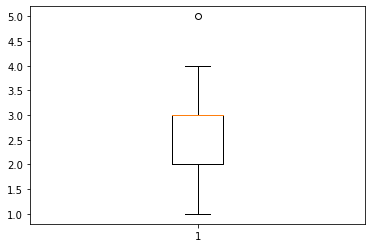

In [96]:
fig, ax = plt.subplots()
ax.boxplot(train_im.NumberOfPersonVisiting)
plt.show()

In [99]:
print(train_im['NumberOfPersonVisiting'].mean())
print(train_im['NumberOfPersonVisiting'].median())

2.9254498714652954
3.0


2. NumberOfFollowups: 120 (영업사원 후속 조치 수)
* 겹치는 이상치 다수 존재 
* 평균 4, 이상치 1이나 6이므로 괜찮을듯

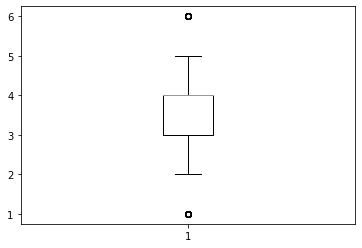

In [101]:
fig, ax = plt.subplots()
ax.boxplot(train_im.NumberOfFollowups)
plt.show()

In [102]:
print(train_im['NumberOfFollowups'].mean())
print(train_im['NumberOfFollowups'].median())

3.7148243359040274
4.0


3. NumberOfTrips: 38 (연간 여행횟수)
* 평균3, 이상치 7.5, 17.5 이상
* 17.5 이상이면 한 달에 1~2번 여행 >> 특수한 상황이면 가능할 것 같음

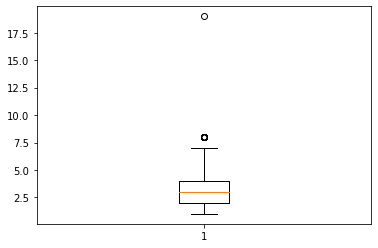

In [103]:
fig, ax = plt.subplots()
ax.boxplot(train_im.NumberOfTrips)
plt.show()

In [104]:
print(train_im['NumberOfTrips'].mean())
print(train_im['NumberOfTrips'].median())

3.2339331619537295
3.0


4. MonthlyIncome: 132 (월 급여)
* 평균 2만 3천, 이상치 0, 3만-4만, 9만 이상
* 20,000 달러 = 2000 만원 // 200만원, 300, 400, 900~1000 가능

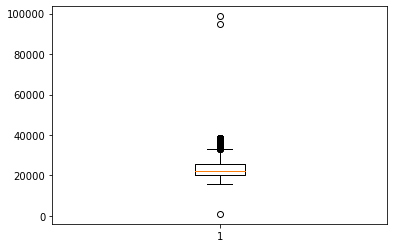

In [105]:
fig, ax = plt.subplots()
ax.boxplot(train_im.MonthlyIncome)
plt.show()

In [106]:
print(train_im['MonthlyIncome'].mean())
print(train_im['MonthlyIncome'].median())

23577.019708654683
22302.666666666668


5. ProdTaken:381 (여행 패키지 신청여부)
* 0, 1로 나타내는 것이므로 괜찮음

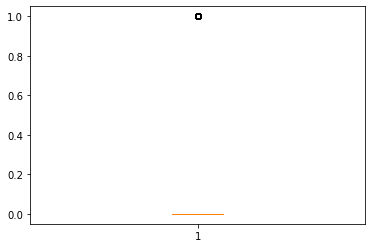

In [107]:
fig, ax = plt.subplots()
ax.boxplot(train_im.ProdTaken)
plt.show()

= 변수 별 이상치 확인해봤을 때, 현실적으로 가능한 값이라고 생각
</br> 이상치는 처리 안 해도 될 듯

### 5. 상관관계

In [115]:
train.corr()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
id,1.000000,0.006332,-0.022072,0.002178,0.036337,-0.010110,-0.011251,0.041546,0.009294,-0.040459,-0.013982,0.028112,0.032920,-0.048933
Age,0.006332,1.000000,0.007875,0.025779,0.010795,0.009834,-0.026789,0.178143,0.030162,0.032860,0.060298,0.039495,0.440733,-0.135832
CityTier,-0.022072,0.007875,1.000000,0.056010,0.018071,0.023532,-0.011882,-0.020887,0.013665,-0.028168,0.014177,0.025359,0.057705,0.085583
DurationOfPitch,0.002178,0.025779,0.056010,1.000000,0.096268,0.039485,-0.004448,0.022236,0.043478,0.011926,-0.015087,0.047770,0.016011,0.072899
NumberOfPersonVisiting,0.036337,0.010795,0.018071,0.096268,1.000000,0.333738,0.017057,0.214895,0.023638,-0.012981,0.018545,0.610193,0.168701,0.006483
NumberOfFollowups,-0.010110,0.009834,0.023532,0.039485,0.333738,1.000000,-0.049151,0.135183,-0.005332,-0.007195,0.051920,0.293942,0.194668,0.105038
PreferredPropertyStar,-0.011251,-0.026789,-0.011882,-0.004448,0.017057,-0.049151,1.000000,0.035064,0.014701,-0.019620,0.031355,0.027038,-0.024338,0.114923
NumberOfTrips,0.041546,0.178143,-0.020887,0.022236,0.214895,0.135183,0.035064,1.000000,0.004418,0.034816,0.005982,0.189517,0.137093,0.044922
Passport,0.009294,0.030162,0.013665,0.043478,0.023638,-0.005332,0.014701,0.004418,1.000000,0.018526,-0.045133,0.030512,0.017044,0.293726
PitchSatisfactionScore,-0.040459,0.032860,-0.028168,0.011926,-0.012981,-0.007195,-0.019620,0.034816,0.018526,1.000000,0.073097,0.023842,-0.005497,0.067736


In [114]:
train_im.corr()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
id,1.000000,0.012906,0.028194,-0.022155,-0.001438,0.011180,0.007507,0.034433,-0.007558,0.018855,-0.016919,-0.004881,0.038712,0.009379,-0.037888,-0.013179,0.028987,0.013811,0.034372,-0.049291
Age,0.012906,1.000000,0.016392,0.008179,0.024232,0.007651,-0.017346,0.017357,0.017313,0.476720,-0.023036,-0.093008,0.157664,0.024533,0.024827,0.060470,0.023199,0.202526,0.439553,-0.132459
TypeofContact,0.028194,0.016392,1.000000,-0.002798,0.004574,0.009587,-0.023797,0.006048,-0.065655,0.023501,0.035050,-0.042066,0.005506,-0.028413,-0.039352,0.008818,-0.005610,0.032273,0.040119,-0.048849
CityTier,-0.022155,0.008179,-0.002798,1.000000,0.055486,0.161966,-0.032010,0.016832,0.022865,0.159860,-0.012353,0.017484,-0.021226,0.012831,-0.027517,0.014561,0.024454,0.140757,0.051516,0.084296
DurationOfPitch,-0.001438,0.024232,0.004574,0.055486,1.000000,0.055732,-0.007505,0.093990,0.039661,0.046135,0.001383,0.008407,0.024587,0.040341,0.012797,-0.013152,0.037878,-0.008184,0.018853,0.073166
Occupation,0.011180,0.007651,0.009587,0.161966,0.055732,1.000000,0.001402,0.008923,-0.019769,0.032859,0.018954,-0.043448,-0.032217,-0.004186,-0.031274,-0.027261,0.006730,0.001007,0.005714,-0.041510
Gender,0.007507,-0.017346,-0.023797,-0.032010,-0.007505,0.001402,1.000000,0.006850,-0.032289,-0.041789,0.001856,-0.024755,0.036207,-0.017768,0.008150,-0.030119,0.037435,-0.036388,-0.027328,0.017447
NumberOfPersonVisiting,0.034433,0.017357,0.006048,0.016832,0.093990,0.008923,0.006850,1.000000,0.337002,-0.056952,0.018802,0.033248,0.203711,0.021298,-0.013645,0.021710,0.603810,-0.008773,0.170036,0.006192
NumberOfFollowups,-0.007558,0.017313,-0.065655,0.022865,0.039661,-0.019769,-0.032289,0.337002,1.000000,0.028025,-0.049441,0.089639,0.127872,-0.003087,-0.009915,0.051907,0.293438,0.057079,0.196815,0.105213
ProductPitched,0.018855,0.476720,0.023501,0.159860,0.046135,0.032859,-0.041789,-0.056952,0.028025,1.000000,-0.004728,-0.060257,0.048007,-0.024826,-0.012065,0.088884,-0.046824,0.351854,0.641933,-0.150377


<AxesSubplot:title={'center':'Corr'}>

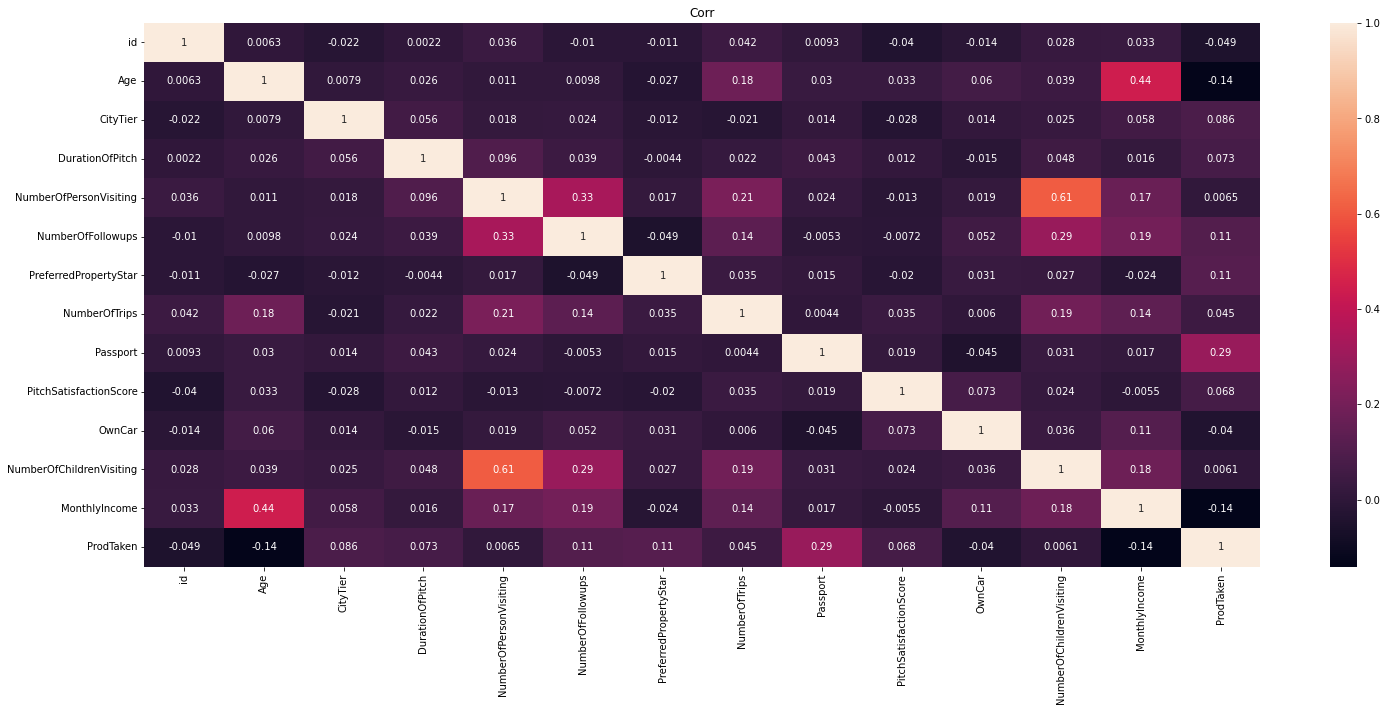

In [113]:
import seaborn as sns

plt.figure(figsize=(25,10))
plt.title('Corr')
sns.heatmap(train.corr(), annot=True)

* numberofChildrenVisiting과 NumberofPersonVisiting: 0.61
* MonthlyIncome과 Age: 0.44
* NumberofFollowups(영업사원 후속조치)와 NumberofPersonVisiting: 0.33
* ProdTaken: Passport(여권 보유여부)와 상관관계 가장 높음
    
</br>= 높은 상관관계는 발견되지 않음

### 6. Model

* test 데이터 전처리

In [ ]:
train_r

In [20]:
test = pd.read_csv('test.csv')
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Super Deluxe,3.0,Single,7.0,0,4,1,1.0,AVP,32328.0
2929,2930,33.0,Self Enquiry,1,9.0,Small Business,Fe Male,4,2.0,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,23733.0
2930,2931,33.0,Company Invited,1,31.0,Salaried,Male,4,4.0,Deluxe,3.0,Divorced,3.0,0,4,1,1.0,Manager,23987.0
2931,2932,26.0,Self Enquiry,1,9.0,Small Business,Male,4,2.0,Basic,5.0,Unmarried,2.0,0,2,1,3.0,Executive,22102.0


### 결측치 처리

In [85]:
test_df = test.copy()

In [86]:
test_df.isna().sum()

id                            0
Age                         132
TypeofContact                15
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2801 non-null   float64
 2   TypeofContact             2918 non-null   object 
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2784 non-null   float64
 5   Occupation                2933 non-null   object 
 6   Gender                    2933 non-null   object 
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2901 non-null   float64
 9   ProductPitched            2933 non-null   object 
 10  PreferredPropertyStar     2917 non-null   float64
 11  MaritalStatus             2933 non-null   object 
 12  NumberOfTrips             2850 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

train데이터와 test데이터 결측치 존재하는 변수 동일

### Gender 값

In [88]:
test_df['Gender'].value_counts()

Male       1709
Female     1125
Fe Male      99
Name: Gender, dtype: int64

In [90]:
# Fe Male을 Female로 변경

test_df.loc[test_df['Gender']=='Fe Male','Gender']= 'Female'

In [91]:
test_df['Gender'].value_counts()

Male      1709
Female    1224
Name: Gender, dtype: int64

### 범주형

* 삭제

In [ ]:
TypeofContact  15

In [92]:
## 결측치 수 적음, 값 대체 시 편향 만들 수 있으며 예측에 영향 미칠 수 있을듯
## 결측치의 특성이 '무작위로 손실' 되지 않았다면, 대부분의 경우 가장 좋은 방법은 제거하는 것

test_df = test_df.dropna(subset=['TypeofContact'])

In [93]:
test_df.isna().sum()

id                            0
Age                         132
TypeofContact                 0
CityTier                      0
DurationOfPitch             134
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               118
dtype: int64

### 수치형

* K-NN Imputation
* KDTree 생성 후 가장 가까운 이웃(NN) 찾기
* K개의 NN을 찾은 뒤에는 거리에 따라 가중 평균 취함

In [ ]:
Age(나이)  132
DurationOfPitch(영업사원이 고객에게 제공하는 프레젠테이션 기간)  149
NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수)  32
PreferredPropertyStar(선호 호텔 숙박업소 등급)  16
NumberOfTrips(평균 여간 여행 횟수)  83
NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수)  39
MonthlyIncome(월 급여)  133

In [94]:
# 범주형 칼럼 추출

ob = test_df.columns[test_df.dtypes == 'object']
ob

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [83]:
train_n

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [ ]:
## gender 처리해줘야함, 학습데이터로 학습시킬 때 라벨인코더 하기 전 데이터를 사용해야함

In [95]:
# 라벨 인코더
## knn임퓨터는 수치형 자료에만 적용 가능 >> 문자형 변수 숫자로 변환

from sklearn.preprocessing import LabelEncoder

for col in ob:
    encoder = LabelEncoder()  # 라벨 인코더
    encoder.fit(train_n[col])  # 학습데이터로 학습
    test_df[col] = encoder.transform(test_df[col]) # 테스트 데이터 문자형 변수 숫자로 변환
    
test_df

C:\Users\abab6\AppData\Local\Temp/ipykernel_27292/3782154900.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = encoder.transform(test_df[col]) # 테스트 데이터 문자형 변수 숫자로 변환


,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,NaN,3,1,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,1,3,NaN,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,1,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,1,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,0,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,0,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,1,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,1,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


In [107]:
## knninputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3) # k 홀수, knnimputer 정의
test_im = imputer.fit_transform(test_df) # 임퓨터로 결측치 대체
test_im = pd.DataFrame(test_im)
test_im 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,32.0,0.0,3.0,9.0,3.0,1.0,2.0,5.0,1.0,3.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,19668.0
1,2.0,46.0,1.0,2.0,11.0,3.0,1.0,3.0,3.0,1.0,4.0,1.0,1.0,1.0,5.0,0.0,1.0,2.0,20021.0
2,3.0,37.0,1.0,3.0,22.0,3.0,1.0,3.0,4.0,1.0,3.0,1.0,5.0,0.0,5.0,1.0,0.0,2.0,21334.0
3,4.0,43.0,1.0,1.0,36.0,3.0,1.0,3.0,6.0,1.0,3.0,3.0,6.0,0.0,3.0,1.0,2.0,2.0,22950.0
4,5.0,25.0,1.0,3.0,7.0,1.0,0.0,4.0,4.0,0.0,4.0,3.0,3.0,1.0,4.0,1.0,3.0,1.0,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2929.0,54.0,1.0,1.0,6.0,3.0,0.0,2.0,3.0,4.0,3.0,2.0,7.0,0.0,4.0,1.0,1.0,0.0,32328.0
2914,2930.0,33.0,1.0,1.0,9.0,3.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,0.0,3.0,0.0,1.0,2.0,23733.0
2915,2931.0,33.0,0.0,1.0,31.0,2.0,1.0,4.0,4.0,1.0,3.0,0.0,3.0,0.0,4.0,1.0,1.0,2.0,23987.0
2916,2932.0,26.0,1.0,1.0,9.0,3.0,1.0,4.0,2.0,0.0,5.0,3.0,2.0,0.0,2.0,1.0,3.0,1.0,22102.0


In [109]:
test_im.columns = ['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']
test_im

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1.0,32.0,0.0,3.0,9.0,3.0,1.0,2.0,5.0,1.0,3.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,19668.0
1,2.0,46.0,1.0,2.0,11.0,3.0,1.0,3.0,3.0,1.0,4.0,1.0,1.0,1.0,5.0,0.0,1.0,2.0,20021.0
2,3.0,37.0,1.0,3.0,22.0,3.0,1.0,3.0,4.0,1.0,3.0,1.0,5.0,0.0,5.0,1.0,0.0,2.0,21334.0
3,4.0,43.0,1.0,1.0,36.0,3.0,1.0,3.0,6.0,1.0,3.0,3.0,6.0,0.0,3.0,1.0,2.0,2.0,22950.0
4,5.0,25.0,1.0,3.0,7.0,1.0,0.0,4.0,4.0,0.0,4.0,3.0,3.0,1.0,4.0,1.0,3.0,1.0,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2929.0,54.0,1.0,1.0,6.0,3.0,0.0,2.0,3.0,4.0,3.0,2.0,7.0,0.0,4.0,1.0,1.0,0.0,32328.0
2914,2930.0,33.0,1.0,1.0,9.0,3.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,0.0,3.0,0.0,1.0,2.0,23733.0
2915,2931.0,33.0,0.0,1.0,31.0,2.0,1.0,4.0,4.0,1.0,3.0,0.0,3.0,0.0,4.0,1.0,1.0,2.0,23987.0
2916,2932.0,26.0,1.0,1.0,9.0,3.0,1.0,4.0,2.0,0.0,5.0,3.0,2.0,0.0,2.0,1.0,3.0,1.0,22102.0


In [117]:
test_r=test_im.copy()
test_r

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1.0,32.0,0.0,3.0,9.0,3.0,1.0,2.0,5.0,1.0,3.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,19668.0
1,2.0,46.0,1.0,2.0,11.0,3.0,1.0,3.0,3.0,1.0,4.0,1.0,1.0,1.0,5.0,0.0,1.0,2.0,20021.0
2,3.0,37.0,1.0,3.0,22.0,3.0,1.0,3.0,4.0,1.0,3.0,1.0,5.0,0.0,5.0,1.0,0.0,2.0,21334.0
3,4.0,43.0,1.0,1.0,36.0,3.0,1.0,3.0,6.0,1.0,3.0,3.0,6.0,0.0,3.0,1.0,2.0,2.0,22950.0
4,5.0,25.0,1.0,3.0,7.0,1.0,0.0,4.0,4.0,0.0,4.0,3.0,3.0,1.0,4.0,1.0,3.0,1.0,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2929.0,54.0,1.0,1.0,6.0,3.0,0.0,2.0,3.0,4.0,3.0,2.0,7.0,0.0,4.0,1.0,1.0,0.0,32328.0
2914,2930.0,33.0,1.0,1.0,9.0,3.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,0.0,3.0,0.0,1.0,2.0,23733.0
2915,2931.0,33.0,0.0,1.0,31.0,2.0,1.0,4.0,4.0,1.0,3.0,0.0,3.0,0.0,4.0,1.0,1.0,2.0,23987.0
2916,2932.0,26.0,1.0,1.0,9.0,3.0,1.0,4.0,2.0,0.0,5.0,3.0,2.0,0.0,2.0,1.0,3.0,1.0,22102.0


### 1. 로지스틱 회귀

로지스틱 회귀 (Logistic Regression)는 예측 분석을 위한 회귀분석 중에서 
</br>특히 종속 변수가 이분형일 때 수행할 수 있는 회귀 분석 기법의 한 종류이다. 
</br>로지스틱 회귀는 하나의 종속 이진 변수와 하나 이상의 숫자형, 명목형, 순서형의 
</br>독립 변수 간의 관계를 그림 1과 같은 로지스틱 회귀함수를 이용하여 
</br>정량적으로 설명하는 데 사용되는 통계기법이다.

In [121]:
from sklearn.linear_model import LogisticRegression

Logistic = LogisticRegression()

In [122]:
# id 제외
train = train_r.drop(columns=['id'])
test = test_r.drop(columns=['id'])

# 분석 목적: prodTake 여행상품 예측
x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

Logistic.fit(x_train,y_train) # 학습

C:\Users\abab6\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abab6\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
# 예측
## 0 신청안함, 1 신청함
prediction = Logistic.predict(test)
prediction[:30]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [132]:
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2928,2929,0
2929,2930,0
2930,2931,0
2931,2932,0


In [133]:
## 파일 제출 >> 값 개수 매치가 안됨

# 예측된 값을 정답파일과 병합
sample_submission['ProdTaken'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

sample_submission.to_csv('reg.csv',index = False)

ValueError: Length of values (2918) does not match length of index (2933)

### 2. 의사결정나무(Decision Tree)

의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 
</br>독립 변수 공간을 분할하는 분류 모형 

* 의사결정나무를 이용한 분류법

1. 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(threshold)을 정한다.
이를 분류 규칙이라고 한다. 

2. 전체 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹(자식 노드 1)과 
해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드 2)으로 나눈다.

3. 각각의 자식 노드에 대해 1~2의 단계를 반복하여 하위의 자식 노드를 만든다. 
단, 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.

</br>이렇게 자식 노드 나누기를 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로
표현할 수 있다.

In [152]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

DecisionTree = DecisionTreeClassifier()

In [153]:
# id 제외
train = train_r.drop(columns=['id'])
test = test_r.drop(columns=['id'])

# 분석 목적: prodTake 여행상품 예측
x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

DecisionTree.fit(x_train, y_train) # 학습

DecisionTreeClassifier()

In [162]:
# 예측값 저장
y_pred = DecisionTree.predict(test)
y_pred[:30]

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

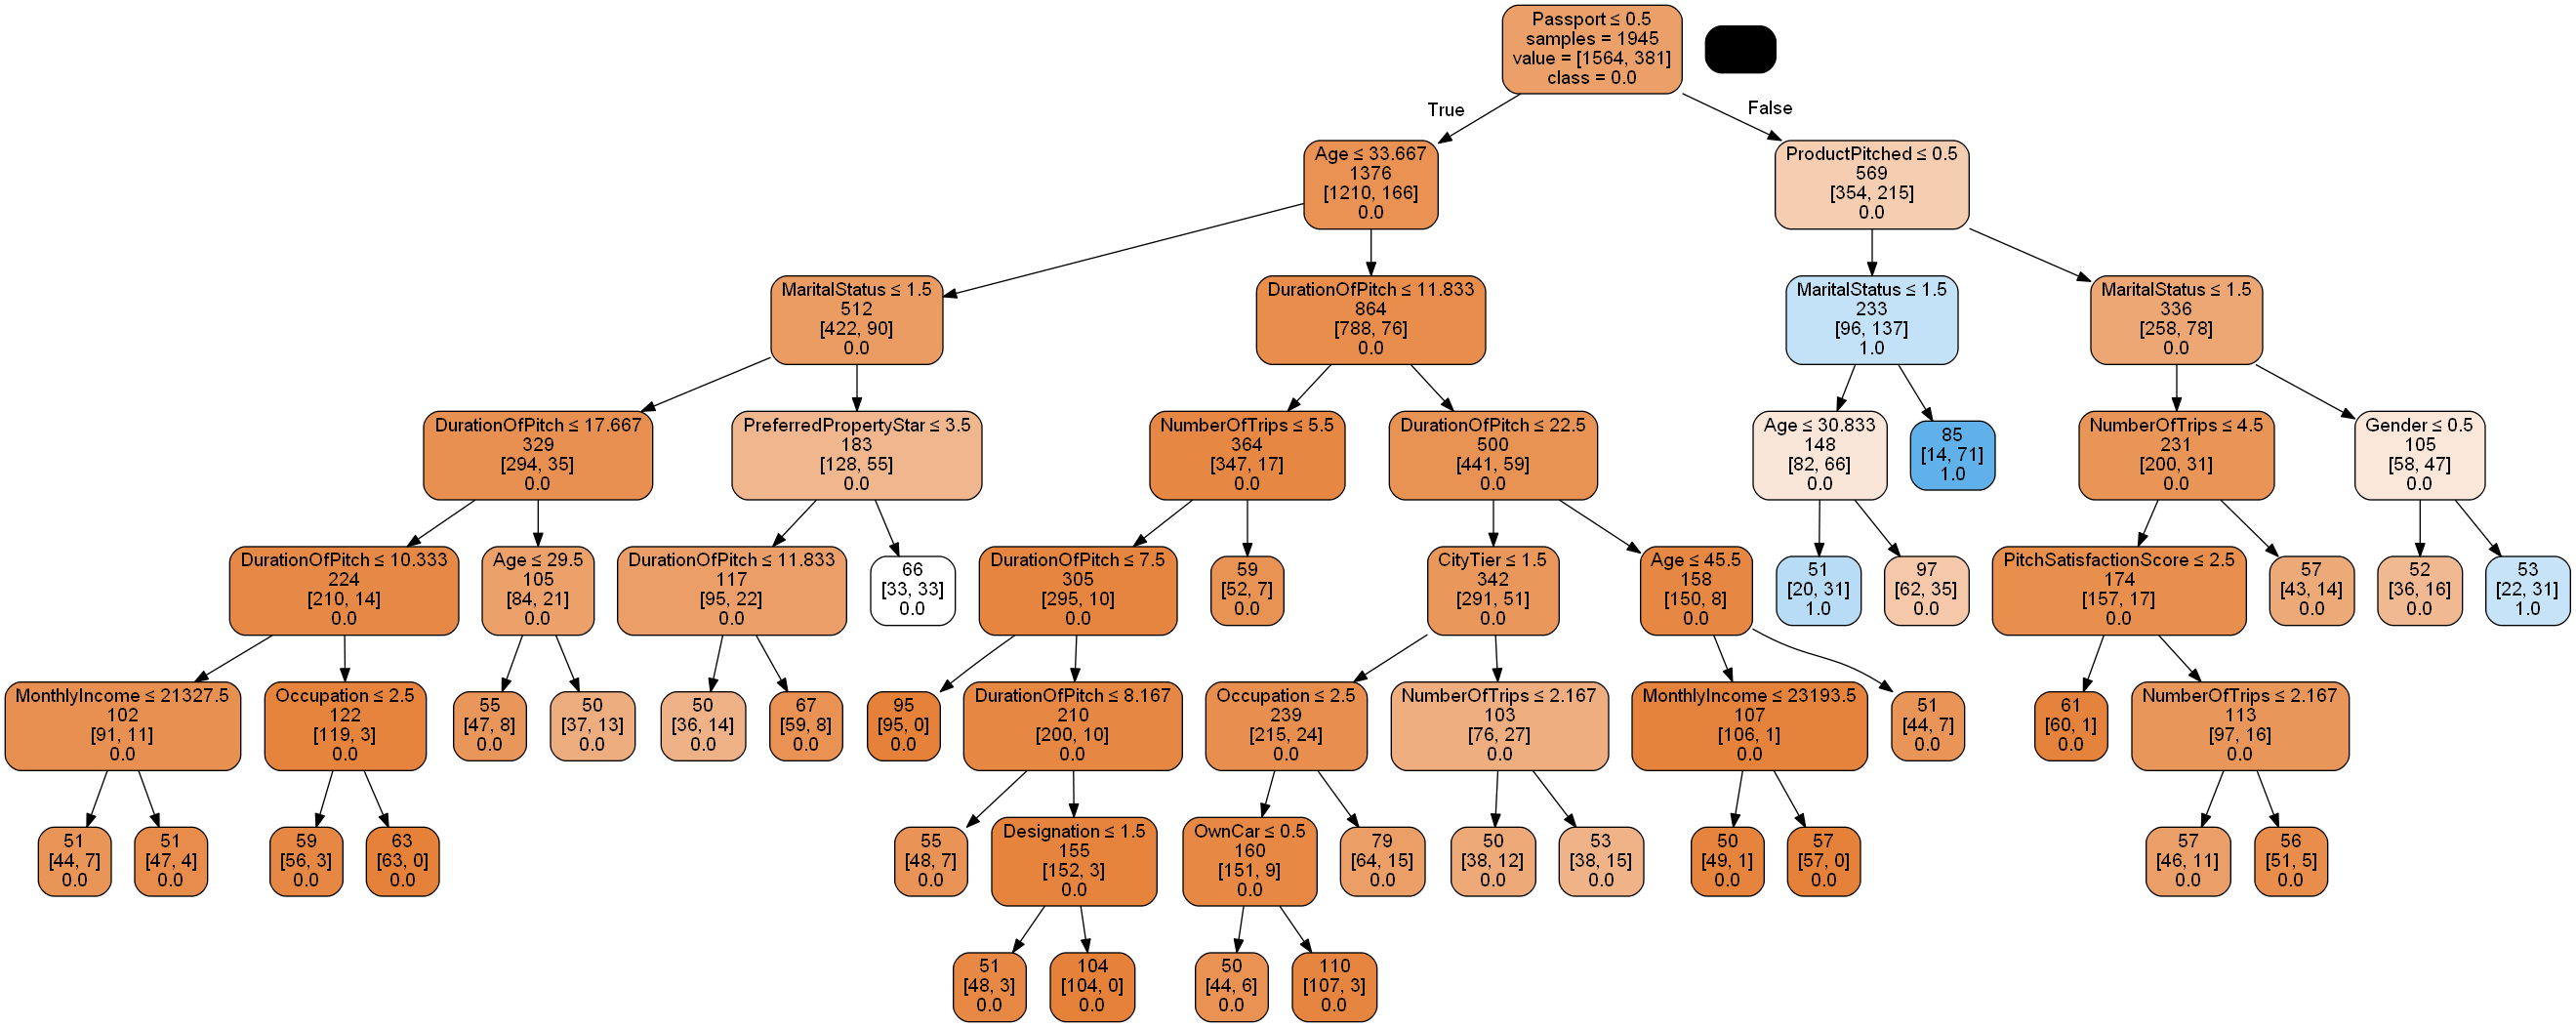

In [155]:
# 시각화

ClassTree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, max_features = 30)

# id 제외
train = train_r.drop(columns=['id'])
test = test_r.drop(columns=['id'])

# 분석 목적: prodTake 여행상품 예측
x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

ClassTree.fit(x_train, y_train)

# class_names: 0인지 1인지
plotDecisionTree(ClassTree, feature_names=x_train.columns, class_names=ClassTree.classes_)

In [161]:
# 분류표

from dmba import classificationSummary
classificationSummary(y_train, ClassTree.predict(x_train))

Confusion Matrix (Accuracy 0.8437)

       Prediction
Actual    0    1
     0 1508   56
     1  248  133


Decision Tree는 overfitting될 가능성이 높다는 약점을 가지고 있음
</br>가지치기를 통해 트리의 최대 높이를 설정해 줄 수 있지만 이로써는 overfitting을 충분히 해결할 수 없음
</br>그러므로 좀더 일반화된 트리를 만드는 방법을 생각해야함
</br>이는 Random Forest(랜덤 포레스트)의 기원이 되는 아이디어임

### 3. 랜덤 포레스트

Random forest는 ensemble(앙상블) machine learning 모델 
</br>여러개의 decision tree를 형성하고 새로운 데이터 포인트를 각 트리에 동시에 통과시키며, 
</br>각 트리가 분류한 결과에서 투표를 실시하여 가장 많이 득표한 결과를 최종 분류 결과로 선택

In [134]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier() # 모델 생성

In [135]:
# id 제외
train = train_r.drop(columns=['id'])
test = test_r.drop(columns=['id'])

# 분석 목적: prodTake 여행상품 예측
x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

RandomForest.fit(x_train,y_train) # 학습

C:\Users\abab6\AppData\Local\Temp/ipykernel_27292/2234490170.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(x_train,y_train) # 학습


RandomForestClassifier()

In [136]:
# 예측
## 0 신청안함, 1 신청함

prediction = Logistic.predict(test)
prediction[:30]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

로지스틱회귀, 랜덤포레스트 모두 5번째 데이터가 신청한다고 예측